#### Programa de Pós Graduação em Engenharia Elétrica - UFPA
#### Disciplina: Redes Neurais Artificiais
#### Docente: Profª Drª Adriana Rosa Garcez Castro
#### Discente: Rodrigo Veiga da Silva
#### Trabalho Final: Aplicação de Machine Learning para obtenção de conhecimento de uma base de dados de Veículos Elétricos. 


#### 1. Introdução

A análise e obtenção de conhecimento de base de dados tornou-se um campo de larga aplicação no meio acadêmico e empresarial. Estes dados são gerados a todo momento nos mais variados domínios. Na ciência são gerados dados de sequenciamento de DNA, experimentos físicos, dinâmicos e simulações. As empresas, como bancos, acumulam dados de transações de cartão de crédito. E as pessoas, em geral, acumulam informações relativas a sua saúde, localização e gastos por meio de dispositivos IOTs como smartphones e smartwatchs. Em 2021, por exemplo, cerca de 79 zettabytes (Zb) de dados foram gerados [1]. 

Essas abundância de dados é considerada uma verdadeira mina de ouro na área, pois pode ajudar países, pessoas e empresas a tomar melhores decisões sobre ações em bolsa de valores ou consumo consciente de energia elétrica. Assim, dado um conjunto de dados podemos obter informações e predizer padrões através de observações e inferências sobre estas informações, o que na literatura, comumente chamamos de ciência de dados. Por exemplo, podemos inferir, dado a renda e o perfil de pagamento de um cliente, se o mesmo pode ou não receber um financiamento bancário para pagar sua casa própria. 

Com a eletrificação dos transportes não é diferente. Em 2021, as vendas globais de veículos elétricos ultrapassaram 6,5 milhões de unidades, o que corresponde a um aumento de 120% em relação a 2020. Além disso, cinco grandes questões impulsionam o mercado de veículos elétricos: políticas governamentais, o efeito tesla, custo mais baixos de bateria, lançamento do 5G e o lançamento do modelo Batery-as-a-service. Fora isso, os veículos elétricos movidos à bateria possuem uma característica tecnológica que tem se tornado valiosa, a tecnologia V2G, do inglês, vehicle-to-grid, que é a capacidade que os veículos têm de alimentar o rede com energia proveniente da sua bateria em momentos que podemos caracterizar como ociosos. Assim, o dono do veículo pode, por exemplo, vender energia e participar de campanhas de gerenciamento pelo lado da demanda. No entanto, alguns desafios dificultam a adoção de veículos elétricos: falta de infraestrutura (como estações de recarga e limite térmico da rede elétrica), altos custos iniciais, falta de conhecimento do consumidor, pressão das empresas petrolíferas e do lobby dos fabricantes de automóveis e potenciais efeitos a longo prazo da pandemia do covid19. 

Dentre as dificuldades mensionadas, a falta de conhecimento do consumidor e a falta de infraestrutura do sistema de energia tem se tornado latentes. O acúmulo de donos de veículos elétricos pode sobrecarregar uma rede elétrica e provocar baixa de tensão na rede de distribuição localmente [2]. Segundo o My Electric Avenue project [2], o impacto de veículos elétricos nas redes de energia pode necessitar até 30% de atualização das redes até 2050. Nesse sentido, organizações como Eletric Nation [2], tem promovido campanhas de coleta de dados de veículos elétricos, onde são obtidas informações dos próprios veículos como, consumo de energia, tempo e potência de carregamento e perfil do consumidor como tempo de conexão e desconexão da rede, dentre outras, afim de obter informações que possam ser utilizadas para tomada de decisão de concessionárias de energia elétrica e do governo.

Este trabalho utiliza a base de dados do electric nation, obtida por meio de medidores inteligentes da empresa Crownd Charge. Os dados são devidamente tratados e filtrados a fim de obter padrões que visem estimar a capacidade de flexibilidade desses veículos. Nesta análise de capacidade, o objetivo é obter perfil de flexibilidade que um cliente pode ter, ou seja, a quantidade de horas que seu veículo está disponível para a rede. Para isso, uma metodoliga baseada em aprendizado de máquina é executada em duas etapas. Primeiramente um algoritmo de clusterização é utilizado em uma tarefa de aprendizado não supervisionado para identificar clusters ou conjuntos de dados que possuem similaridade entre si. Finalmente um modelo de rede neural é utilizado para classificar os clientes que possuem potenciais de flexibilidade divididos em três classes distintas: baixa disponibilidade, média disponibilidade, e alta disponibilidade. Todo o trabalho foi feito por meio do jupyter notebook usando a linguagem python, o algoritmo kmeans é obtido por meio do framework scikit-learn e a rede neural MLP por meio do pytorch. Particularmente, a MLP foi executada com o auxílio de GPU do google colab.

#### 2. Jupyter Notebook

O jupyter notebook tem se tornado a principal ferramenta de utilização de engenheiros de aprendizado de máquina, cientista de dados e analista de dados. Nesta ferramenta é possível mesclar código e texto no mesmo documento, facilitando e permitindo o acesso fácil e otimizado às rotinas de código e à abordagem da pesquisa. Este documento, então, pode ter executado por qualquer pessoa e em qualquer máquina, desde que possua o base de dados e o pacote anaconda (https://anaconda.org/) instalado no computador.

#### 3. Carremento e Pré-processamento dos dados

##### 3.1. Import de bibliotecas e carregamento da base de dados

Inicialmente carregamos as bibliotecas ou "frameworks" python que serão utilizadas no processamento e em seguida fazemos o carregamento dos dados utilizando a biblioteca pandas.  

In [73]:
# import das principais bibliotecas utilizadas para análise de dados no ambiente do python.

import numpy as np # processamento de arrays
import pandas as pd # processamento de dataframes (base de dados)
from scipy import stats
from mlxtend.preprocessing import minmax_scaling # ferramenta de scaling de dados
import seaborn as sns # ferramenta de visualização e plot de dados
import matplotlib.pyplot as plt #ferramenta de visualização e plot de dados
from sklearn.preprocessing import MinMaxScaler # ferramenta de scaling de dados 

file_path = 'C:/Users/Rodrigo Veiga/OneDrive/Doutorado/TarefasAdriana/CrowdCharge Transactions.xlsx' # arquivo dataset em xlsx

df = pd.read_excel(file_path)

Abaixo temos a cara da nossa base de dados onde as linhas representam os objetos ou padrões e as colunas representam os atributos. A base possui um total de 20 atributos e 71264 objetos.

In [74]:
df.head()

TransactionID  ChargerID ParticipantID  CarKW  CarKWh           StartTime  \
0         100000   36002417        EN1012    7.0    24.0 2017-03-08 17:50:00   
1         100001   36002417        EN1012    7.0    24.0 2017-03-12 00:06:00   
2         100002   36002417        EN1012    7.0    24.0 2017-03-15 00:10:00   
3         100003   36002417        EN1012    7.0    24.0 2017-03-24 16:40:00   
4         100004   36002417        EN1012    7.0    24.0 2017-03-24 20:23:00   

             StopTime  Trial   AdjustedStartTime    AdjustedStopTime  \
0 2017-03-08 20:54:00    NaN 2017-03-08 17:50:00 2017-03-08 20:54:00   
1 2017-03-12 10:36:00    NaN 2017-03-12 00:06:00 2017-03-12 10:36:00   
2 2017-03-15 08:48:00    NaN 2017-03-15 00:10:00 2017-03-15 08:48:00   
3 2017-03-24 19:45:00    NaN 2017-03-24 16:40:00 2017-03-24 19:45:00   
4 2017-03-25 08:05:00    NaN 2017-03-24 20:23:00 2017-03-25 08:05:00   

   PluggedInTime  ConsumedkWh Weekday_or_Weekend Max_Current_Drawn_for_T  \
0            184        13.74            Weekday                     NaN   
1            630        13.83            Weekend                     NaN   
2            518        16.92            Weekday                     NaN   
3            185        13.54            Weekday                     NaN   
4            702         2.54            Weekday                     NaN   

            EndCharge  ChargingDuration  t_inactive_start  t_inactive_end  \
0                 NaT               NaN               NaN             NaN   
1                 NaT               NaN               NaN             NaN   
2                 NaT               NaN               NaN             NaN   
3                 NaT               NaN               NaN             NaN   
4 2017-03-25 06:41:00             139.0             479.0            84.0   

  Used_a_Timer Hot_Unplug  
0          NaN        NaN  
1          NaN        NaN  
2          NaN        NaN  
3          NaN        NaN  
4          Yes         No

In [75]:
df.shape

(71264, 20)

##### 3.2. Descrição dos atributos

Descrição dos atributos.

-   Transaction ID: added in the database to identify each transaction.  Also appears in the meter value data (i.e. to relate meter values to the transaction they relate to).  Transactions with ID beginning 2 are from a group of chargers where the match between charger and participant was unknown (due to errors in installations etc.).

-   ChargerID: identification number of the charger used
-   Participant ID: EN number for the participant linked to each charger.  Blank where participant ID is not known.
-   ParticipantCarkW: the rating of the participant’s vehicle, based on the ‘ChargerInstall’ data provided by DriveElectric
-   ParticipantCarkWh: the battery capacity of the participant’s vehicle, based on the ‘ChargerInstall’ data provided by DriveElectric
-   StartTime: plug-in time for the transaction, in UTC
-   StopTime: un-plug time for the transaction, in UTC.  N.B. these times do not equate to the time when charging started or ended.
-   Group ID: the group the charger belonged to for this transaction.  When chargers were not in the smart charging group they were not in a group and so the group ID is shown as NULL.
-   Trial: 1, 2 or 3 depending on which part of the trial applied to the group ID (for details of Trial 1, 2 and 3 see the final report).  When chargers were not in the smart charging group the Trial ID is NULL.  N.B. Events which took place during Trial 3 are likely to have been affected by the time of use incentive and so should be analysed separately.

-   Adjusted Start Time: Plug-in time in local time (i.e. equal to UTC when GMT applied, and adjusted to local time during British Summer Time).
-   Adjusted StopTime: as above, but for unplug time
-   PluggedInTime: the length of time the vehicle was plugged in, in minutes
-   ConsumedkWh: the energy transferred during the charging event, as recorded by the energy meter within the charger.  All records are included in the data.  Analysis for the Electric Nation report excluded events where less than 0.5kWh or more than 100kWh was consumed.

-   PartofManagedGroup: ‘Yes’ if the charger was in a smart charging group for this transaction.  N.B. this doesn’t mean the individual transaction was managed/curtailed.  No were GroupID or Trial is NULL.
-   Weekday or Weekend: If the vehicle was plugged in on a Monday – Friday then this shows ‘Weekday’.  If it was plugged in Saturday or Sunday, then Weekend.
-   ActiveChargingStart: the time when charging began, calculated using the meter value records (where these were available).  This is shown in local time only.  If it was not possible to calculate the start time (typically because the charger was offline so the meter value records were lost) then ‘NULL’ is shown.
-   MaxAmpsDrawnforT: the maximum current drawn for this transaction ID, at any point between the plug-in and plug-out times.
-   EndCharge: an estimate of the time when charging ended (as distinct from the time when the vehicle was unplugged).  This was calculated based on the meter value data (looking for sustained reductions in the current being drawn in the absence of demand management).  In some cases it may be inaccurate – this can be checked by calculating an equivalent charge rate and comparing to the rating of the charger.  For example, if ActiveChargingStart was 17:00 and EndCharge was 18:30, but 21kWh of energy was transferred then it’s likely that EndCharge is inaccurate (because it isn’t possible to add 21kWh in 1.5 hours using a 7kW charger).  NULL where is wasn’t possible to calculate this value (typically because meter values weren’t available).

-   ChargingDuration: time between ActiveChargingStart and EndCharge (if both values are available) in minutes
-   tInactiveStart: the number of minutes between plug-in and ActiveChargingStart.  Used to show whether or not a timer was used.
-   tInactiveEnd: the number of minutes between the end of charging and plug-out.  Used to show whether or not the event was hot unplugged.
-   UsedATimer: “Yes” where t active start is at least 30 minutes.  ‘No’ if t inactive start is less than 30 minutes.  NULL (unknown) if t inactive start is NULL.
-   BeganInWeekdayEveningPeak: NULL if ActiveChargingStart is NULL (time when charging began is unknown). ‘Yes’ if charging began between 16:00 and 19:59 on a weekday (Monday – Friday), otherwise ‘No’.
-   Hot Unplug:  Further details of the reasoning behind this logic is provided in Section 8.8 of the Final Customer Trial Report.
NULL if ActiveChargingStart is NULL.
‘No’ if t inactive end is greater than 15 minutes
‘Yes’ if ‘Used a Timer’ is ‘No’ and t inactive end is less than 15 minutes.
‘May be departure time’ if t inactive end is less than 15 minutes and ‘Used a Timer’ is ‘Yes’.
-   T1 Managed:
NULL if Trial is not 1 (i.e. this value is only populated for Trial 1)
‘Yes’ if the transaction was constrained at some point during charging
‘No’ if it was not.  Transactions which took place when the charger was offline (where meter values are not available so quantities such as ActiveChargingStart are NULL) were not managed, so these are shown as ‘No’.
-   T2 Managed (N.B. all Trial 3 were effectively ‘managed’ because of the CrowdCharge algorithm used alongside the ToU tariff, therefore there are no T3 Managed columns): 
NULL if Trial is not 2 (i.e. this value is only populated for Trial 2)
‘Yes’ if the transaction was constrained at some point during charging
‘No’ if it was not.  Transactions which took place when the charger was offline (where meter values are not available so quantities such as ActiveChargingStart are NULL) were not managed, so these are shown as ‘No’.
-   Restriction T1: calculated using the methodology set out in Section 10.1.4 of the Final Customer Trial Report:
Blank if the transaction did not occur in Trial 1, or it fails any of the criteria set out on Page 238 to 239 of the final report.
Otherwise, equal to 1 – (Theoretical Minimum Charging Time/ Actual Charging Time)
-   Restriction T2: calculated using the methodology set out in Section 10.1.4 of the Final Customer Trial Report:
Blank if the transaction did not occur in Trial 2, or it fails any of the criteria set out on Page 238 to 239 of the final report.
Otherwise, equal to 1 – (Theoretical Minimum Charging Time/ Actual Charging Time)

##### 3.3. Processamento de dados faltantes

A primeira prática de pré-processamento tem como objetivo identificar a quantidade de células nulas ou com valores nan e decidir o que fazer com estas células.

In [76]:
missing_values_count_df = df.isnull().sum()

In [77]:
missing_values_count_df[0:20]

TransactionID                  0
ChargerID                      0
ParticipantID               3899
CarKW                       3899
CarKWh                      3899
StartTime                      0
StopTime                       0
Trial                      24034
AdjustedStartTime              0
AdjustedStopTime               0
PluggedInTime                  0
ConsumedkWh                    1
Weekday_or_Weekend             0
Max_Current_Drawn_for_T    35520
EndCharge                  20855
ChargingDuration           20861
t_inactive_start           19707
t_inactive_end             20855
Used_a_Timer               19707
Hot_Unplug                 19839
dtype: int64

A critério de velocidade, foi decidido excluir as colunas e as linhas nas quais existem dados faltantes. Basicamente alguns objetos são perdidos, no entanto garantimos que nenhum dado foi imputado e, assim, nenhum ruído é adicionado a base de dados, mantendo as medidas reais fidedignas. Muitas atributos não possuem qualquer relevância. Exemplo: o atributo "TransactionID" possuia apenas a função de idexar cada objeto. Assim, não possui qualquer utilidade na nossa rede, necessitando ser removido da base. As demais colunas foram excluídas baseado na quantidade de dados faltantes.

In [78]:
df = df.dropna()
df.head(5)

TransactionID  ChargerID ParticipantID  CarKW  CarKWh           StartTime  \
13         100013   36002417        EN1012    7.0    24.0 2017-09-04 17:29:00   
14         100014   36002417        EN1012    7.0    24.0 2017-09-05 21:07:00   
15         100015   36002417        EN1012    7.0    24.0 2017-09-06 21:40:00   
16         100016   36002417        EN1012    7.0    24.0 2017-09-17 16:02:00   
17         100017   36002417        EN1012    7.0    24.0 2017-09-26 21:01:00   

              StopTime  Trial   AdjustedStartTime    AdjustedStopTime  \
13 2017-09-04 20:09:00    1.0 2017-09-04 18:29:00 2017-09-04 21:09:00   
14 2017-09-06 07:06:00    1.0 2017-09-05 22:07:00 2017-09-06 08:06:00   
15 2017-09-07 06:38:00    1.0 2017-09-06 22:40:00 2017-09-07 07:38:00   
16 2017-09-18 06:56:00    1.0 2017-09-17 17:02:00 2017-09-18 07:56:00   
17 2017-09-27 06:31:00    1.0 2017-09-26 22:01:00 2017-09-27 07:31:00   

    PluggedInTime  ConsumedkWh Weekday_or_Weekend Max_Current_Drawn_for_T  \
13            160        14.41            Weekday     1900-01-28 07:12:00   
14            599        20.97            Weekday     1900-01-27 20:38:24   
15            538        13.99            Weekday     1900-01-27 14:24:00   
16            894        15.60            Weekend     1900-01-28 14:24:00   
17            570        15.86            Weekday     1900-01-27 20:52:48   

             EndCharge  ChargingDuration  t_inactive_start  t_inactive_end  \
13 2017-09-04 21:05:00             155.0               1.0             4.0   
14 2017-09-06 01:29:00             201.0               1.0           397.0   
15 2017-09-07 01:08:00             147.0               1.0           390.0   
16 2017-09-17 19:40:00             157.0               1.0           736.0   
17 2017-09-27 00:50:00             168.0               1.0           401.0   

   Used_a_Timer Hot_Unplug  
13           No        Yes  
14           No         No  
15           No         No  
16           No         No  
17           No         No

In [79]:

df.drop(labels = 
    [
    
    'TransactionID', 'ChargerID', 'Trial', 'ParticipantID','AdjustedStartTime', 'AdjustedStopTime', 
    
    'Max_Current_Drawn_for_T', 't_inactive_start', 't_inactive_end', 'Used_a_Timer','Hot_Unplug' 
    
    ], inplace = True, axis = 1)

In [80]:
df.reset_index(drop = True, inplace = True)
df.head()

CarKW  CarKWh           StartTime            StopTime  PluggedInTime  \
0    7.0    24.0 2017-09-04 17:29:00 2017-09-04 20:09:00            160   
1    7.0    24.0 2017-09-05 21:07:00 2017-09-06 07:06:00            599   
2    7.0    24.0 2017-09-06 21:40:00 2017-09-07 06:38:00            538   
3    7.0    24.0 2017-09-17 16:02:00 2017-09-18 06:56:00            894   
4    7.0    24.0 2017-09-26 21:01:00 2017-09-27 06:31:00            570   

   ConsumedkWh Weekday_or_Weekend           EndCharge  ChargingDuration  
0        14.41            Weekday 2017-09-04 21:05:00             155.0  
1        20.97            Weekday 2017-09-06 01:29:00             201.0  
2        13.99            Weekday 2017-09-07 01:08:00             147.0  
3        15.60            Weekend 2017-09-17 19:40:00             157.0  
4        15.86            Weekday 2017-09-27 00:50:00             168.0

##### 3.4. Cálculo de novos atributos

3.4.1. Adição de DeltaTime

Uma nova coluna foi adicionada ao data set, chamada de DeltaTime, que tem o objetivo de calcular a diferença entre os atributos StartTime e StopTime. Nesse caso este é o tempo liquido em horas resultado da diferença entre o horário que o veículo foi desconectado do carregador menos o horário que ele foi conectado ao carregador. Interpretamos esse DeltaTime como o tempo em que o veículo ficou conectado à rede de distribuição de energia.


In [81]:
df['DeltaTime'] = df['StopTime'] - df['StartTime']
df.head()

CarKW  CarKWh           StartTime            StopTime  PluggedInTime  \
0    7.0    24.0 2017-09-04 17:29:00 2017-09-04 20:09:00            160   
1    7.0    24.0 2017-09-05 21:07:00 2017-09-06 07:06:00            599   
2    7.0    24.0 2017-09-06 21:40:00 2017-09-07 06:38:00            538   
3    7.0    24.0 2017-09-17 16:02:00 2017-09-18 06:56:00            894   
4    7.0    24.0 2017-09-26 21:01:00 2017-09-27 06:31:00            570   

   ConsumedkWh Weekday_or_Weekend           EndCharge  ChargingDuration  \
0        14.41            Weekday 2017-09-04 21:05:00             155.0   
1        20.97            Weekday 2017-09-06 01:29:00             201.0   
2        13.99            Weekday 2017-09-07 01:08:00             147.0   
3        15.60            Weekend 2017-09-17 19:40:00             157.0   
4        15.86            Weekday 2017-09-27 00:50:00             168.0   

        DeltaTime  
0 0 days 02:40:00  
1 0 days 09:59:00  
2 0 days 08:58:00  
3 0 days 14:54:00  
4 0 days 09:30:00

3.4.2. Adição de ChargingTime


Esta coluna tem o objetivo de calcular a o tempo de carregamento do veículo em horas segundo a equação $t = E(t)/P(t)$, onde $E(t)$ é a energia consumida em $kWh$ e $P(t)$ é a energia em $kW$.

In [83]:
df['ChargingTime'] = df['ConsumedkWh']/df['CarKW']
df.head()

CarKW  CarKWh           StartTime            StopTime  PluggedInTime  \
0    7.0    24.0 2017-09-04 17:29:00 2017-09-04 20:09:00            160   
1    7.0    24.0 2017-09-05 21:07:00 2017-09-06 07:06:00            599   
2    7.0    24.0 2017-09-06 21:40:00 2017-09-07 06:38:00            538   
3    7.0    24.0 2017-09-17 16:02:00 2017-09-18 06:56:00            894   
4    7.0    24.0 2017-09-26 21:01:00 2017-09-27 06:31:00            570   

   ConsumedkWh Weekday_or_Weekend           EndCharge  ChargingDuration  \
0        14.41            Weekday 2017-09-04 21:05:00             155.0   
1        20.97            Weekday 2017-09-06 01:29:00             201.0   
2        13.99            Weekday 2017-09-07 01:08:00             147.0   
3        15.60            Weekend 2017-09-17 19:40:00             157.0   
4        15.86            Weekday 2017-09-27 00:50:00             168.0   

        DeltaTime  ChargingTime  
0 0 days 02:40:00      2.058571  
1 0 days 09:59:00      2.995714  
2 0 days 08:58:00      1.998571  
3 0 days 14:54:00      2.228571  
4 0 days 09:30:00      2.265714

##### 3.5. Transformação de dados

Alguns atributos estão em um tipo de dado que não podem ser imputado, por exemplo, na entrada de uma rede neural que aceita apenas valores puramente numéricos ou vetores. A exemplo das variáveis de tempo como StartTime, StopTime e EndCharge, estas precisam ser transformadas para um dado numérico (ou float). A variável Weekday_or_Weekend, que nos diz se o carregamento do veículo foi feito em um dia da semana ou no fim de semana, respectivamente, é uma string e também não pode ser processada nesse tipo de dado. Como esta informação é binária, foi atribuido 1 para Weekday e 0 para Weekend.

In [92]:
type(df['StartTime'][1]), type(df['Weekday_or_Weekend'][1])

(pandas._libs.tslibs.timestamps.Timestamp, str)

In [87]:
StartTime = df.StartTime
StopTime = df.StopTime
EndCharge = df.EndCharge
Weekday_or_Weekend = df.Weekday_or_Weekend
DeltaTime = df.DeltaTime

In [88]:
StartTime2float = []
StopTime2float = []
EndCharge2float = []
Weekday_ornot = []
DeltaTime2Float = []

In [89]:
for i in range(len(StartTime)):
    
    StartTime2float =  np.append(StartTime2float,StartTime[i].hour + (StartTime[i].minute)/60)
    
    StopTime2float = np.append(StopTime2float, StopTime[i].hour + (StopTime[i].minute)/60 )
    
    EndCharge2float = np.append(EndCharge2float, EndCharge[i].hour + (EndCharge[i].minute)/60)

    DeltaTime2Float = np.append(DeltaTime2Float, DeltaTime[i].total_seconds()/3600)

    if Weekday_or_Weekend[i] == 'Weekday':
        Weekday_ornot = np.append(Weekday_ornot, 1)
    else:
        Weekday_ornot = np.append(Weekday_ornot, 0)


In [93]:
df['StartTime'] = pd.Series(StartTime2float)
df['StopTime'] = pd.Series(StopTime2float)
df['EndCharge'] = pd.Series(EndCharge2float)
df['Weekday_or_Weekend'] = pd.Series(Weekday_ornot)
df['DeltaTime'] = pd.Series(DeltaTime2Float)

In [94]:
df.head()

CarKW  CarKWh  StartTime   StopTime  PluggedInTime  ConsumedkWh  \
0    7.0    24.0  17.483333  20.150000            160        14.41   
1    7.0    24.0  21.116667   7.100000            599        20.97   
2    7.0    24.0  21.666667   6.633333            538        13.99   
3    7.0    24.0  16.033333   6.933333            894        15.60   
4    7.0    24.0  21.016667   6.516667            570        15.86   

   Weekday_or_Weekend  EndCharge  ChargingDuration  DeltaTime  ChargingTime  
0                 1.0  21.083333             155.0   2.666667      2.058571  
1                 1.0   1.483333             201.0   9.983333      2.995714  
2                 1.0   1.133333             147.0   8.966667      1.998571  
3                 0.0  19.666667             157.0  14.900000      2.228571  
4                 1.0   0.833333             168.0   9.500000      2.265714

3.5.1. Adição da variável IdleTime 

A variável IdleTime tem um papel importantíssimo neste trabalho, pois associa a cada objeto da base um tempo líquido em horas que o veículo elétrico permaneceu ocioso. Este valor é obtido pela equação $IdleTime(t) = DeltaTime(t) - ChargingTime(t)$. 

In [95]:
df['IdleTime'] = abs(df['DeltaTime'] - df['ChargingTime'])
df.head()

CarKW  CarKWh  StartTime   StopTime  PluggedInTime  ConsumedkWh  \
0    7.0    24.0  17.483333  20.150000            160        14.41   
1    7.0    24.0  21.116667   7.100000            599        20.97   
2    7.0    24.0  21.666667   6.633333            538        13.99   
3    7.0    24.0  16.033333   6.933333            894        15.60   
4    7.0    24.0  21.016667   6.516667            570        15.86   

   Weekday_or_Weekend  EndCharge  ChargingDuration  DeltaTime  ChargingTime  \
0                 1.0  21.083333             155.0   2.666667      2.058571   
1                 1.0   1.483333             201.0   9.983333      2.995714   
2                 1.0   1.133333             147.0   8.966667      1.998571   
3                 0.0  19.666667             157.0  14.900000      2.228571   
4                 1.0   0.833333             168.0   9.500000      2.265714   

    IdleTime  
0   0.608095  
1   6.987619  
2   6.968095  
3  12.671429  
4   7.234286

Alguns valores absurdos de energia são exluídos da base de dados, como consumos energéticos que ultrapassam a capacidade de bateria de qualquer veículo elétrico do mercado. Considerados outliers, estes dados foram devidamente removidos do dataset.

In [96]:
df = df[df['ConsumedkWh'] <= 100]

In [97]:
df = df[df['DeltaTime'] <= 48]
df

CarKW  CarKWh  StartTime   StopTime  PluggedInTime  ConsumedkWh  \
0        7.0    24.0  17.483333  20.150000            160        14.41   
1        7.0    24.0  21.116667   7.100000            599        20.97   
2        7.0    24.0  21.666667   6.633333            538        13.99   
3        7.0    24.0  16.033333   6.933333            894        15.60   
4        7.0    24.0  21.016667   6.516667            570        15.86   
...      ...     ...        ...        ...            ...          ...   
35739    3.6     7.6  21.416667   7.866667            627         6.97   
35740    3.6     7.6  18.550000   7.916667            802         7.39   
35741    3.6     7.6   0.716667  19.033333           1099         7.61   
35742    3.6     7.6  21.950000   7.550000           2016         7.43   
35743    3.6     7.6  18.933333   7.900000            778         7.55   

       Weekday_or_Weekend  EndCharge  ChargingDuration  DeltaTime  \
0                     1.0  21.083333             155.0   2.666667   
1                     1.0   1.483333             201.0   9.983333   
2                     1.0   1.133333             147.0   8.966667   
3                     0.0  19.666667             157.0  14.900000   
4                     1.0   0.833333             168.0   9.500000   
...                   ...        ...               ...        ...   
35739                 1.0  23.100000             100.0  10.450000   
35740                 1.0  20.366667             108.0  13.366667   
35741                 0.0   2.516667             107.0  18.316667   
35742                 0.0  23.633333             100.0  33.600000   
35743                 1.0  20.750000             108.0  12.966667   

       ChargingTime   IdleTime  
0          2.058571   0.608095  
1          2.995714   6.987619  
2          1.998571   6.968095  
3          2.228571  12.671429  
4          2.265714   7.234286  
...             ...        ...  
35739      1.936111   8.513889  
35740      2.052778  11.313889  
35741      2.113889  16.202778  
35742      2.063889  31.536111  
35743      2.097222  10.869444  

[35125 rows x 12 columns]

#### 4. Clusterização utilizando KMeans

##### 4.1. Normalizando os dados

Uma vez que alguns atributos variam diferentemente de outros e que e que estas quantidades discrepantes podem contribuir para um baixo desempenho dos algoritmos de clusterização e classificação, uma prática comum é normalizar os dados dentro de um intervalo especificado. Neste caso, todos os atributis serão normalizados dentro do intervalo de 0-1.

In [98]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
print(values)

[[0.03080785 0.10562692 0.07694628 ... 0.01173632 0.00906002 0.0026763 ]
 [0.01105521 0.03790359 0.0333499  ... 0.01576684 0.00473118 0.01103566]
 [0.01252153 0.04293097 0.03875712 ... 0.01603949 0.00357503 0.01246446]
 ...
 [0.00325882 0.00687973 0.00064875 ... 0.01658075 0.00191355 0.0146672 ]
 [0.00178279 0.00376366 0.01087006 ... 0.01663936 0.00102208 0.01561728]
 [0.00457859 0.0096659  0.02407997 ... 0.01649139 0.00266731 0.01382408]]


##### 4.2. Clusterização usando k-means

O algoritmo kmeans agrupa os dados tentando separar amostras em n grupos de variância igual, minimizando um critério conhecido como inércia ou soma dos quadrados dentro do cluster. Este algoritmo requer que o número de clusters seja especificado. Ele se adapta bem a um grande número de amostras e tem sido usado em uma grande variedade de áreas de aplicação em muitos campos diferentes. O algoritmo k-means divide um conjunto de $N$ amostras $X$ em $k$ clusters distintos $C$, cada um descrito pela média $\mu_j$ das amostras no cluster. 

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)

y_pred = kmeans.fit_predict(values)

##### 4.2. Validação dos resultados do k-means

Índice $silhouette score$

A validação busca garantir que os clusters obtidos pelo algoritmo do k-means tem sentido estatístico apropriado. Dessa forma, a primeira métrica observada é o silhouette_score, que é calculada usando a distância média intra cluster $(a)$ e a distância média do cluster mais próximo $(b)$ para cada amostra. Nesse caso o silhouette_score é dado por $s = (b - a)/max(a,b)$. Nessa métrica o melhor valor é 1 e o pior é -1. Nesta aplicação obtivemos um silhouette_score de aproximadamente $0.43$. O que extremamente aceitável.

In [29]:
from sklearn import metrics
labels = kmeans.labels_

silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
print(silhouette)

0.4320732427668202


Índice Davies-Bouldin

A pontuação é definida como a medida de similaridade média de cada cluster com seu cluster mais semelhante, onde a similaridade é a razão entre as distâncias dentro do cluster e as distâncias entre os clusters. Assim, clusters mais distantes e menos dispersos resultarão em uma pontuação melhor.
A pontuação mínima é zero, com valores mais baixos indicando melhor agrupamento. Obtivemos um valor de $0.87$, o que é aceitável para este trabalho.

In [99]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

0.8743863169948949


Pontuação de Calinski e Harabasz.

Se os rótulos não forem conhecidos, o índice de Calinski-Harabasz - também conhecido como Critério da Razão de Variância - pode ser usado para avaliar o modelo, onde uma pontuação de Calinski-Harabasz mais alta se refere a um modelo com clusters mais bem definidos. O valor obtido para esta métrica foi de aproximadamente, $50440$ o que é um excelente resultado.

In [100]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

50439.92750297426


##### 4.3. Visualização dos clusters

Obter a visualização dos clusters tem como objetivo identificar os padrões graficamente por meio de um plot de pontos, também conhecido como scatter plot. No entanto, dada a complexidade de alguns problema, fica difícil determinar algo apenas do ponto de vista gráfico. Nesse caso, são necessárias outras análises que busquem identificar graficamente um 

In [101]:
df.head()

CarKW  CarKWh  StartTime   StopTime  PluggedInTime  ConsumedkWh  \
0    7.0    24.0  17.483333  20.150000            160        14.41   
1    7.0    24.0  21.116667   7.100000            599        20.97   
2    7.0    24.0  21.666667   6.633333            538        13.99   
3    7.0    24.0  16.033333   6.933333            894        15.60   
4    7.0    24.0  21.016667   6.516667            570        15.86   

   Weekday_or_Weekend  EndCharge  ChargingDuration  DeltaTime  ChargingTime  \
0                 1.0  21.083333             155.0   2.666667      2.058571   
1                 1.0   1.483333             201.0   9.983333      2.995714   
2                 1.0   1.133333             147.0   8.966667      1.998571   
3                 0.0  19.666667             157.0  14.900000      2.228571   
4                 1.0   0.833333             168.0   9.500000      2.265714   

    IdleTime  
0   0.608095  
1   6.987619  
2   6.968095  
3  12.671429  
4   7.234286

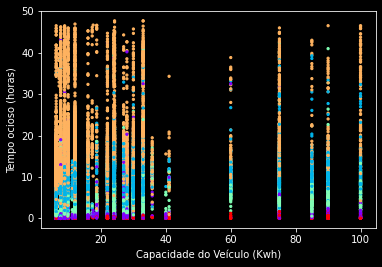

In [35]:
plt.scatter(df['CarKWh'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Capacidade do Veículo (Kwh)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

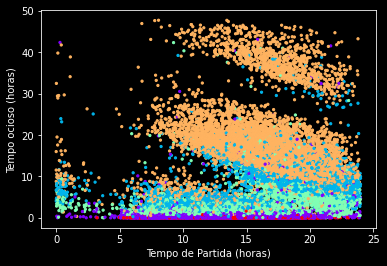

In [36]:
plt.scatter(df['StartTime'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Tempo de Partida (horas)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

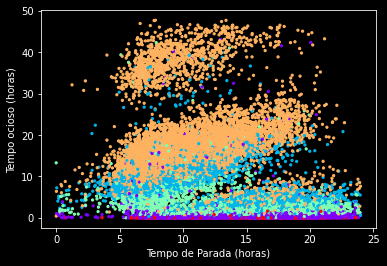

In [37]:
plt.scatter(df['StopTime'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Tempo de Parada (horas)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

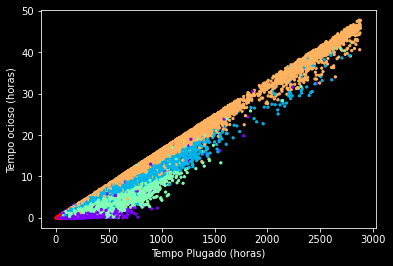

In [38]:
plt.scatter(df['PluggedInTime'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Tempo Plugado (horas)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

In [39]:
plt.scatter(df['ConsumedkWh'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Energia consumida (kWh)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

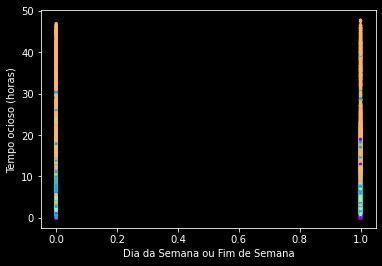

In [40]:
plt.scatter(df['Weekday_or_Weekend'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Dia da Semana ou Fim de Semana')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

In [41]:
plt.scatter(df['EndCharge'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Fim da Carga (horas)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

In [42]:
plt.scatter(df['ChargingDuration'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Duração da carga (horas)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

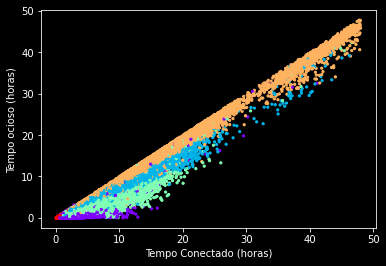

In [43]:
plt.scatter(df['DeltaTime'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Tempo Conectado (horas)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()


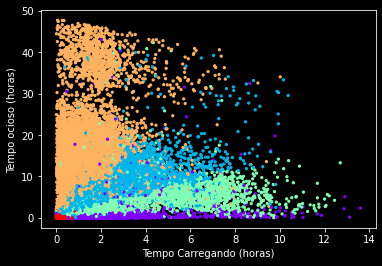

In [44]:
plt.scatter(df['ChargingTime'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Tempo Carregando (horas)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()

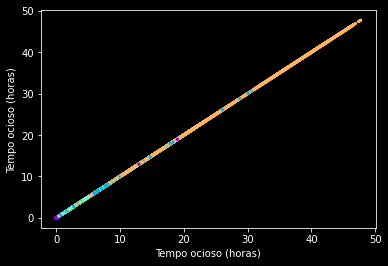

In [45]:
plt.scatter(df['IdleTime'], df['IdleTime'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Tempo ocioso (horas)')
plt.ylabel('Tempo ocioso (horas)')
plt.show()



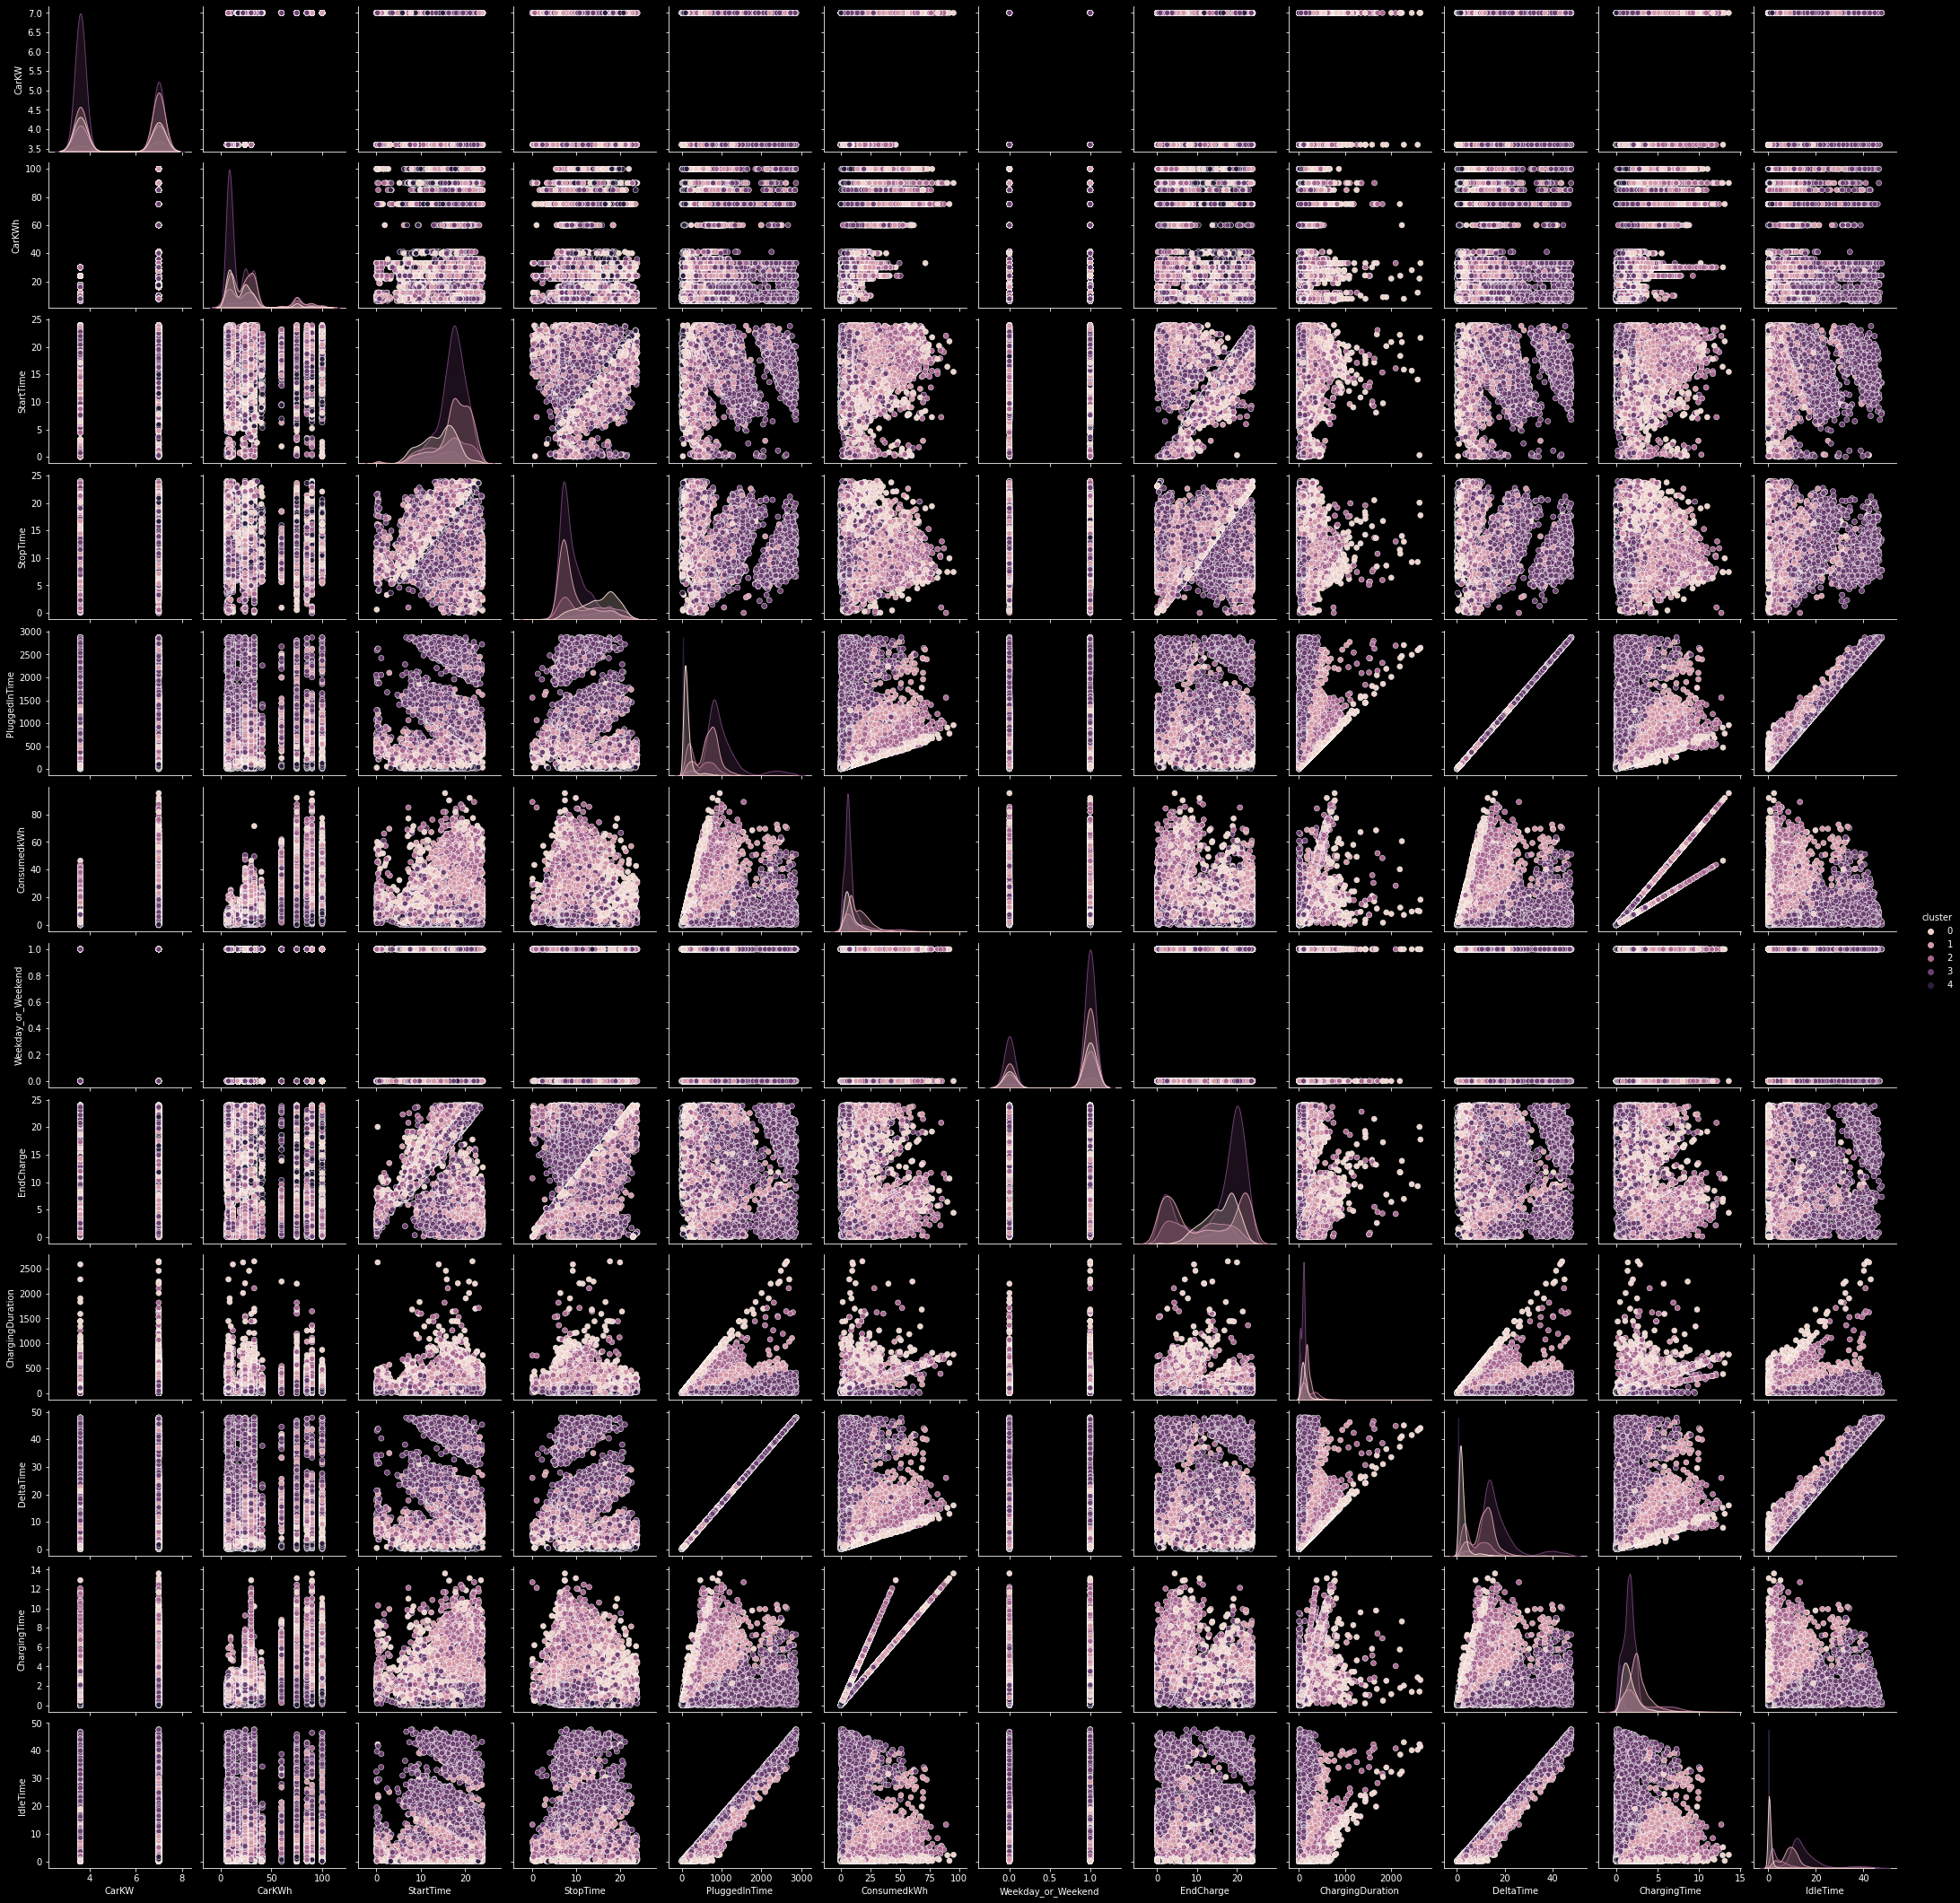

In [46]:
import seaborn as sns

df['cluster'] = labels

sns.pairplot(df[0:], hue = 'cluster')

In [47]:
df.head()

CarKW  CarKWh  StartTime   StopTime  PluggedInTime  ConsumedkWh  \
0    7.0    24.0  17.483333  20.150000            160        14.41   
1    7.0    24.0  21.116667   7.100000            599        20.97   
2    7.0    24.0  21.666667   6.633333            538        13.99   
3    7.0    24.0  16.033333   6.933333            894        15.60   
4    7.0    24.0  21.016667   6.516667            570        15.86   

   Weekday_or_Weekend  EndCharge  ChargingDuration  DeltaTime  ChargingTime  \
0                 1.0  21.083333             155.0   2.666667      2.058571   
1                 1.0   1.483333             201.0   9.983333      2.995714   
2                 1.0   1.133333             147.0   8.966667      1.998571   
3                 0.0  19.666667             157.0  14.900000      2.228571   
4                 1.0   0.833333             168.0   9.500000      2.265714   

    IdleTime  cluster  
0   0.608095        0  
1   6.987619        1  
2   6.968095        1  
3  12.671429        3  
4   7.234286        1

In [48]:
centroids = kmeans.cluster_centers_
print(centroids)

[[3.47289797e-02 1.21070019e-01 9.78736456e-02 1.08000899e-01
  7.09346317e-01 4.62644136e-02 5.23292189e-03 1.12308118e-01
  6.51969035e-01 1.18224386e-02 9.32693125e-03 2.69253796e-03]
 [9.88137028e-03 4.64563467e-02 3.06103413e-02 2.13160415e-02
  9.61917187e-01 2.03291068e-02 1.42315112e-03 2.33262445e-02
  2.49836264e-01 1.60319531e-02 3.72635610e-03 1.23057004e-02]
 [1.65475432e-02 6.88982468e-02 4.80503987e-02 4.90927437e-02
  8.71239772e-01 3.38087855e-02 2.43174275e-03 4.63962491e-02
  4.61610463e-01 1.45206629e-02 6.54151410e-03 8.01354535e-03]
 [5.79048283e-03 2.28271782e-02 2.07432781e-02 1.21117934e-02
  9.92297664e-01 8.34677876e-03 9.07954417e-04 1.89185411e-02
  9.69214647e-02 1.65382944e-02 1.76989203e-03 1.47690953e-02]
 [8.59507483e-02 3.95229281e-01 2.22865875e-01 2.32325758e-01
  5.75407902e-01 4.21071632e-02 1.15665475e-02 2.42132001e-01
  5.00855659e-01 9.59013169e-03 7.59356850e-03 2.29646285e-03]]


In [51]:
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i], '\n{:.4f}'.format(centroids[:, i].var()))

CarKW 
0.0009
CarKWh 
0.0185
StartTime 
0.0055
StopTime 
0.0066
PluggedInTime 
0.0249
ConsumedkWh 
0.0002
Weekday_or_Weekend 
0.0000
EndCharge 
0.0070
ChargingDuration 
0.0383
DeltaTime 
0.0000
ChargingTime 
0.0000
IdleTime 
0.0000


CarKWh  0.0185
ChargingDuration 0.0383
PluggedInTime 0.0249


In [52]:
df.groupby('cluster')['CarKWh'].describe()

count       mean        std  min   25%   50%   75%    max
cluster                                                             
0         5659.0  21.646846  18.840310  6.2   8.8  16.0  27.0  100.0
1         8439.0  30.098862  23.598713  6.2  12.0  24.0  33.0  100.0
2         4779.0  30.880184  26.583812  6.2   8.8  24.0  33.0  100.0
3        14529.0  19.683020  19.045901  6.2   7.6  12.0  24.2  100.0
4         1719.0  31.663874  25.224437  6.2  12.0  24.0  33.0  100.0

In [54]:
description = df.groupby("cluster")["CarKWh", "ChargingDuration", "PluggedInTime", "IdleTime"]
n_clients = description.size()
description = description.mean()
print(description)

            CarKWh  ChargingDuration  PluggedInTime   IdleTime
cluster                                                       
0        21.646846        143.771691     156.374801   0.884666
1        30.098862        178.438204     694.002251   8.956712
2        30.880184        235.093953     442.365139   4.248752
3        19.683020         91.940257    1012.655930  15.291489
4        31.663874         37.227458      42.900524   0.183887


C:\Users\RODRIG~1\AppData\Local\Temp/ipykernel_14832/429371223.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["CarKWh", "ChargingDuration", "PluggedInTime", "IdleTime"]


cluster 0 - > baixa capacidade ociosa 
cluster 1 - > média capacidade ociosa
cluster 2 - > média baixa capacidade ociosa
cluster 3 - > alta capacidade ociosa
cluster 4 - > baixa capacidade ociosa

## Visualização dos clusters

Data Scaling 

In [137]:
min_max_scaler = MinMaxScaler()

df_escaled = min_max_scaler.fit_transform(df)

In [138]:
df

CarKW  CarKWh  StartTime   StopTime  PluggedInTime  ConsumedkWh  \
0        7.0    24.0  17.483333  20.150000            160        14.41   
1        7.0    24.0  21.116667   7.100000            599        20.97   
2        7.0    24.0  21.666667   6.633333            538        13.99   
3        7.0    24.0  16.033333   6.933333            894        15.60   
4        7.0    24.0  21.016667   6.516667            570        15.86   
...      ...     ...        ...        ...            ...          ...   
35739    3.6     7.6  21.416667   7.866667            627         6.97   
35740    3.6     7.6  18.550000   7.916667            802         7.39   
35741    3.6     7.6   0.716667  19.033333           1099         7.61   
35742    3.6     7.6  21.950000   7.550000           2016         7.43   
35743    3.6     7.6  18.933333   7.900000            778         7.55   

       Weekday_or_Weekend  EndCharge  ChargingDuration  DeltaTime  \
0                     1.0  21.083333             155.0   2.666667   
1                     1.0   1.483333             201.0   9.983333   
2                     1.0   1.133333             147.0   8.966667   
3                     0.0  19.666667             157.0  14.900000   
4                     1.0   0.833333             168.0   9.500000   
...                   ...        ...               ...        ...   
35739                 1.0  23.100000             100.0  10.450000   
35740                 1.0  20.366667             108.0  13.366667   
35741                 0.0   2.516667             107.0  18.316667   
35742                 0.0  23.633333             100.0  33.600000   
35743                 1.0  20.750000             108.0  12.966667   

       ChargingTime   IdleTime  
0          2.058571   0.608095  
1          2.995714   6.987619  
2          1.998571   6.968095  
3          2.228571  12.671429  
4          2.265714   7.234286  
...             ...        ...  
35739      1.936111   8.513889  
35740      2.052778  11.313889  
35741      2.113889  16.202778  
35742      2.063889  31.536111  
35743      2.097222  10.869444  

[35125 rows x 12 columns]

In [139]:
#plt.Figure()
#plt.hist(df.DeltaTime, density = True, bins = 100)
#plt.xlabel('tempo (horas)')
#plt.title('Idle Time')
#plt.ylabel('Densidade de Probabilidade')

Plot da Variável StartTime

In [140]:
#plt.Figure()
#plt.hist(StartTime2float, density = True, bins = 100)
#plt.xlabel('tempo (horas)')
#plt.title('Start Time')
#plt.ylabel('Densidade de Probabilidade')

Plot da Variável StopTime

In [141]:
#plt.Figure()
#plt.hist(StopTime2float, density = True, bins = 100)
#plt.xlabel('tempo (horas)')
#plt.ylabel('Densidade de Probabilidade')
#plt.title('Stop Time')


In [142]:
#red_diamond = dict(markerfacecolor='r', marker='D')
#fig1, ax1 = plt.subplots()
#ax1.set_title('Basic Plot')
#ax1.boxplot(df_escaled, flierprops=red_diamond)

Descrição dos dados

In [143]:
df.describe().round(2)

CarKW    CarKWh  StartTime  StopTime  PluggedInTime  ConsumedkWh  \
count  35125.00  35125.00   35125.00  35125.00       35125.00     35125.00   
mean       5.12     24.61      16.32     11.08         673.09        10.82   
std        1.69     22.24       4.06      4.64         501.85        10.38   
min        3.60      6.20       0.00      0.00           2.00         0.01   
25%        3.60      8.80      14.17      7.28         208.00         4.78   
50%        3.60     18.70      17.03      9.48         702.00         7.34   
75%        7.00     30.00      19.13     14.58         905.00        13.50   
max        7.00    100.00      23.98     23.98        2880.00        95.24   

       Weekday_or_Weekend  EndCharge  ChargingDuration  DeltaTime  \
count            35125.00   35125.00          35125.00   35125.00   
mean                 0.74      13.96            137.87      11.22   
std                  0.44       7.30            123.27       8.36   
min                  0.00       0.00              2.00       0.03   
25%                  0.00       7.30             69.00       3.47   
50%                  1.00      16.35            110.00      11.70   
75%                  1.00      20.08            169.00      15.08   
max                  1.00      23.98           2646.00      48.00   

       ChargingTime  IdleTime  
count      35125.00  35125.00  
mean           2.02      9.21  
std            1.52      8.14  
min            0.00      0.00  
25%            1.07      1.77  
50%            1.71      9.20  
75%            2.46     12.99  
max           13.61     47.68

Matriz de Correlação 

CarKW    CarKWh  StartTime  StopTime  PluggedInTime  \
CarKW               1.000000  0.651531  -0.004027 -0.044690       0.021435   
CarKWh              0.651531  1.000000   0.060877 -0.118508       0.105198   
StartTime          -0.004027  0.060877   1.000000 -0.220274       0.223678   
StopTime           -0.044690 -0.118508  -0.220274  1.000000      -0.366901   
PluggedInTime       0.021435  0.105198   0.223678 -0.366901       1.000000   
ConsumedkWh         0.475333  0.659770   0.180836 -0.192383       0.200894   
Weekday_or_Weekend  0.001765 -0.006869   0.131660 -0.058613      -0.054816   
EndCharge          -0.206027 -0.279255  -0.008030  0.209540      -0.066641   
ChargingDuration    0.237515  0.361432   0.164995 -0.158350       0.232520   
DeltaTime           0.021435  0.105198   0.223678 -0.366901       1.000000   
ChargingTime        0.182158  0.493087   0.222699 -0.215408       0.227040   
IdleTime           -0.012231  0.016812   0.187916 -0.336325       0.983774   

                    ConsumedkWh  Weekday_or_Weekend  EndCharge  \
CarKW                  0.475333            0.001765  -0.206027   
CarKWh                 0.659770           -0.006869  -0.279255   
StartTime              0.180836            0.131660  -0.008030   
StopTime              -0.192383           -0.058613   0.209540   
PluggedInTime          0.200894           -0.054816  -0.066641   
ConsumedkWh            1.000000            0.011164  -0.294569   
Weekday_or_Weekend     0.011164            1.000000   0.027569   
EndCharge             -0.294569            0.027569   1.000000   
ChargingDuration       0.666671            0.012227  -0.265559   
DeltaTime              0.200894           -0.054816  -0.066641   
ChargingTime           0.921989            0.017819  -0.269932   
IdleTime               0.036084           -0.059719  -0.018393   

                    ChargingDuration  DeltaTime  ChargingTime  IdleTime  
CarKW                       0.237515   0.021435      0.182158 -0.012231  
CarKWh                      0.361432   0.105198      0.493087  0.016812  
StartTime                   0.164995   0.223678      0.222699  0.187916  
StopTime                   -0.158350  -0.366901     -0.215408 -0.336325  
PluggedInTime               0.232520   1.000000      0.227040  0.983774  
ConsumedkWh                 0.666671   0.200894      0.921989  0.036084  
Weekday_or_Weekend          0.012227  -0.054816      0.017819 -0.059719  
EndCharge                  -0.265559  -0.066641     -0.269932 -0.018393  
ChargingDuration            1.000000   0.232520      0.686554  0.111507  
DeltaTime                   0.232520   1.000000      0.227040  0.983774  
ChargingTime                0.686554   0.227040      1.000000  0.049578  
IdleTime                    0.111507   0.983774      0.049578  1.000000

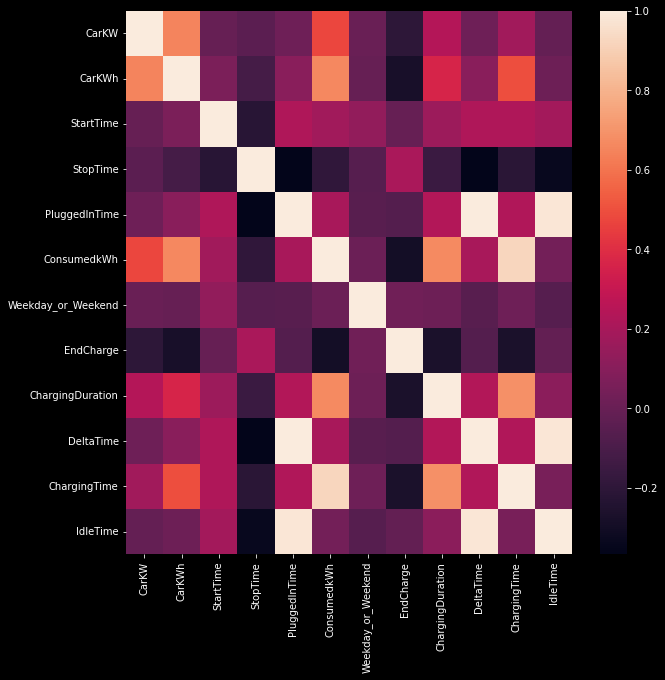

In [144]:
corr_matrix = df.corr()
fig = plt.figure(figsize=(10, 10))
display(corr_matrix)
sns.heatmap(corr_matrix);

In [145]:
df.drop(labels = 
    [
    
    'StopTime', 'PluggedInTime', 'ConsumedkWh', 'EndCharge', 
    
    'ChargingDuration', 'DeltaTime', 'ChargingTime'
    
    ], inplace = True, axis = 1)

Box Plot

<AxesSubplot:title={'center':'Idle Time'}, xlabel='Tempo (horas)'>

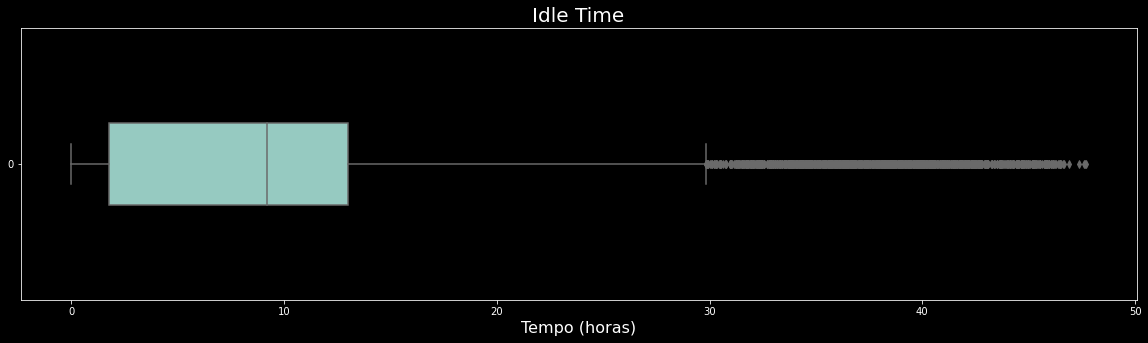

In [146]:
ax = sns.boxplot(data = df['IdleTime'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20,5)
ax.set_title('Idle Time', fontsize = 20)
ax.set_xlabel('Tempo (horas)', fontsize = 16)
ax

Distribuição de frequências


c:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency'}, xlabel='Idle Time (hours)', ylabel='Density'>

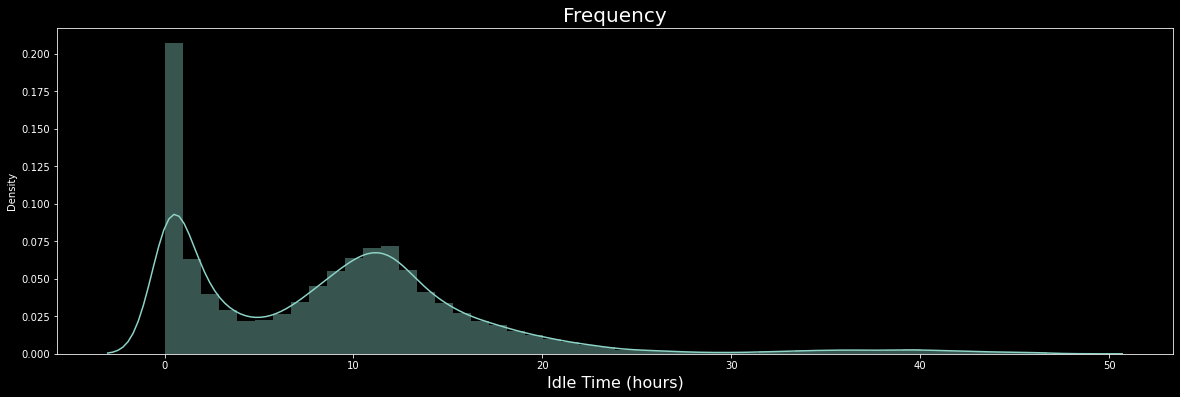

In [147]:
ax = sns.distplot(df['IdleTime'])
ax.figure.set_size_inches(20,6)
ax.set_title('Frequency', fontsize = 20)
ax.set_xlabel('Idle Time (hours)', fontsize = 16)
ax

Gráfico de dispersão

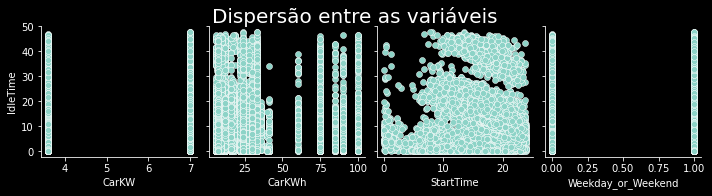

In [148]:
ax = sns.pairplot(df, y_vars = 'IdleTime', x_vars = df.drop(labels = 'IdleTime', axis=1, ))
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.05)
ax

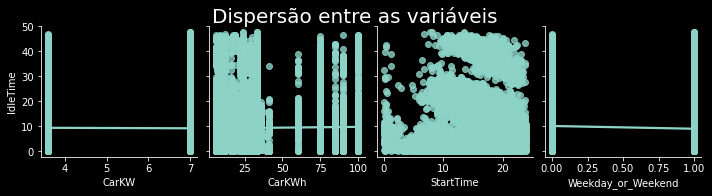

In [149]:
ax = sns.pairplot(df, y_vars = 'IdleTime', x_vars = df.drop(labels = 'IdleTime', axis=1, ), kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.05)
ax

## Data Transforming

Logarithm transform to the dataset

In [150]:
#df['log_CarKW'] = np.log(df['CarKW'])
#df['log_CarKWh'] = np.log(df['CarKWh'])
#df['log_StartTime'] = np.log(df['StartTime']+1)
#df['log_StopTime'] = np.log(df['StopTime']+1)
#df['log_PluggedInTime'] = np.log(df['PluggedInTime'])
#df['log_ConsumedkWh'] = np.log(df['ConsumedkWh']+1)
#df['log_Weekday_or_Weekend'] = np.log(df['Weekday_or_Weekend']+1)
#df['log_EndCharge'] = np.log(df['EndCharge']+1)
#df['log_ChargingDuration'] = np.log(df['ChargingDuration'])
#df['log_DeltaTime'] = np.log(df['DeltaTime']+1)
#df['log_ChargingTime'] = np.log(df['ChargingTime']+1)
#df['log_Idle'] = np.log(df['IdleTime']+1)

In [151]:
#df.head()

log Idle Time Plot

In [152]:
#ax = sns.distplot(df['log_Idle'])
#ax.figure.set_size_inches(20,6)
#ax.set_title('Frequency', fontsize = 20)
#ax.set_xlabel('Idle Time (hours)', fontsize = 16)
#ax

In [153]:
#ax = sns.pairplot(df, y_vars = 'log_Idle', x_vars = 
#[
#'log_CarKW', 'log_CarKWh', 'log_StartTime', 'log_StopTime', 'log_PluggedInTime', 
#'log_ConsumedkWh', 'log_Weekday_or_Weekend', 'log_EndCharge', 'log_ChargingDuration',
#'log_DeltaTime', 'log_ChargingTime'
#])
#ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.05)
#ax

## Model build - Regression

Data Split

In [154]:
#x = df[[
#'log_CarKW', 'log_CarKWh', 'log_StartTime', 'log_StopTime', 'log_PluggedInTime', 
#'log_ConsumedkWh', 'log_Weekday_or_Weekend', 'log_EndCharge', 'log_ChargingDuration',
#'log_DeltaTime', 'log_ChargingTime'
#]]

In [155]:
X = df.drop(labels = 'IdleTime' , axis = 1)

In [156]:
y = df['IdleTime']

In [157]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

statistics with statsmodels

In [158]:
import statsmodels.api as sm 

x_train_with_constant = sm.add_constant(x_train)

c:\ANACONDA\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [159]:
model_statsmodels = sm.OLS(y_train, x_train_with_constant, hasconst = True).fit()

In [160]:
print(model_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               IdleTime   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     322.0
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.31e-271
Time:                        17:08:11   Log-Likelihood:                -98185.
No. Observations:               28100   AIC:                         1.964e+05
Df Residuals:                   28095   BIC:                         1.964e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3264      0

Model build

In [161]:
from sklearn import linear_model

rgs = linear_model.LinearRegression(fit_intercept = False, normalize = True)

Treino

In [162]:
rgs.fit(x_train, y_train)

c:\ANACONDA\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(fit_intercept=False, normalize=True)

Model Score

In [163]:
rgs.score(x_test,y_test)

0.030146290206688464

In [164]:
y_previsto = rgs.predict(x_train)

<AxesSubplot:title={'center':'Previsão x Real'}, xlabel='Iddle Time - Predict', ylabel='Iddle Time - Real'>

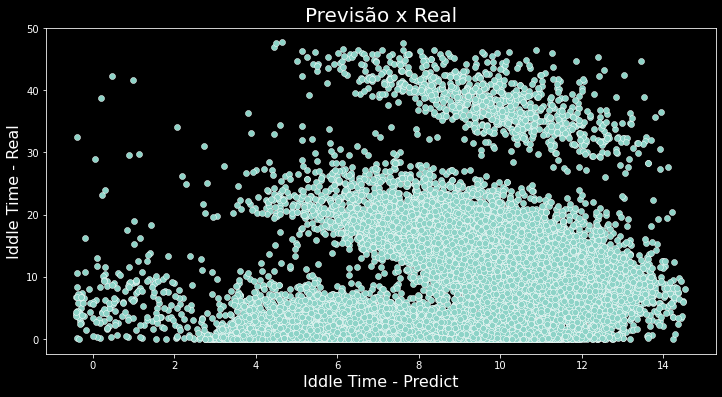

In [165]:
ax = sns.scatterplot(x = y_previsto, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize = 20)
ax.set_ylabel('Iddle Time - Real', fontsize = 16)
ax.set_xlabel('Iddle Time - Predict', fontsize = 16)
ax

Regression Usando MLP

In [166]:
from sklearn.neural_network import MLPRegressor

mlrgs = MLPRegressor().fit(x_train,y_train)

mlrgs.predict(x_test)

array([ 8.77051754,  9.70298596,  6.13010728, ..., 11.02158946,
        4.13573357, 10.95574736])

In [167]:
mlrgs.score(x_test, y_test)

0.0912208517274854

In [168]:
import sklearn.cluster 